In [13]:
import numpy as np
import pandas as pd

In [14]:
import os
from PIL import Image

In [15]:
data1=pd.read_csv("/home/saloni/Machine-learning/wordament/fonts/ARIAL.csv")
#data2=pd.read_csv("/home/saloni/Machine-learning/wordament/fonts/COURIER.csv")
#data3=pd.read_csv("/home/saloni/Machine-learning/wordament/fonts/TIMES.csv")
#data4=pd.read_csv("/home/saloni/Machine-learning/wordament/fonts/CALIBRI.csv")
#data5=pd.read_csv("/home/saloni/Machine-learning/wordament/fonts/ROMAN.csv")

FileNotFoundError: File b'/home/saloni/Machine-learning/wordament/fonts/ARIAL.csv' does not exist

In [19]:
folder="./testing_data"

In [20]:
def data_read(folder):
    test_input=[]
    test_output=[]
    for i in os.listdir(folder):
        im=Image.open(os.path.join(folder,i))
        im=im.resize((60,60))
        im=im.convert('L')
        im.load()
        test_input.append(np.abs(np.asarray(im,dtype='int32')-255))
        test_output.append(ord(i[-5])-65)
    return test_input,test_output
    
    

In [21]:
test_input,test_output=data_read(folder)

In [22]:
(np.unique(test_output))

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8, 10, 11, 12, 13, 14, 15, 17, 18,
       19, 20, 21, 22, 24])

In [23]:
test_output=np.array(test_output)
print(test_output.shape)

(343,)


In [24]:
from sklearn.preprocessing import OneHotEncoder
enc=OneHotEncoder(26)
test_output=test_output.reshape(-1,1)
test_output_enc=enc.fit_transform(test_output).toarray()

In [25]:
test_input=np.array(test_input)

In [26]:
test_output_enc.shape

(343, 26)

In [27]:
import matplotlib.pyplot as plt
plt.imshow(X_train[112].reshape(60,60))
plt.show()

NameError: name 'X_train' is not defined

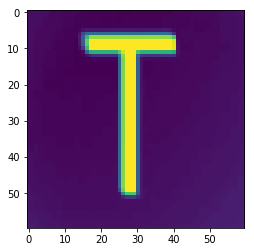

In [81]:
import matplotlib.pyplot as plt
plt.imshow(test_input[0].reshape(60,60))
plt.show()

In [4]:
from keras.models import Model
from keras.layers import Dense,Input,Conv2D,MaxPooling2D,GlobalAveragePooling2D,Activation,Dropout
from keras.losses import binary_crossentropy
from keras.optimizers import Adam,SGD

Using TensorFlow backend.


In [31]:
def model():
    inputs=l=Input((60,60,1))
    l=Conv2D(32,(3,3),padding="same",name="conv_1")(l)
    l=Activation("relu",name="conv_act_1")(l)
    l=MaxPooling2D((3,3),strides=(2,2),padding="valid",name="conv_pool1")(l)
    
    
    l=Conv2D(64,(3,3),padding="same",name="conv_2")(l)
    l=Activation("relu",name="conv_act_2")(l)
    l=MaxPooling2D((3,3),strides=(2,2),padding="valid",name="conv_pool2")(l)
    
    l=Conv2D(128,(3,3),padding="same",name="conv_3")(l)
    l=Activation("relu",name="conv_act_3")(l)
    l=GlobalAveragePooling2D()(l)
    l=Dropout(0.5)(l)
    
    l=Dense(64,activation="relu",name="d1")(l)
    l=Dense(26,activation="softmax",name="d2")(l)
    outputs=l
    return inputs,outputs
    

In [32]:
inputs,outputs=model()
mod=Model(inputs=inputs,outputs=outputs)
optim=Adam(1e-4)
mod.compile(optimizer=optim,loss="categorical_crossentropy",metrics=["accuracy"])
mod.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 60, 60, 1)         0         
_________________________________________________________________
conv_1 (Conv2D)              (None, 60, 60, 32)        320       
_________________________________________________________________
conv_act_1 (Activation)      (None, 60, 60, 32)        0         
_________________________________________________________________
conv_pool1 (MaxPooling2D)    (None, 29, 29, 32)        0         
_________________________________________________________________
conv_2 (Conv2D)              (None, 29, 29, 64)        18496     
_________________________________________________________________
conv_act_2 (Activation)      (None, 29, 29, 64)        0         
_________________________________________________________________
conv_pool2 (MaxPooling2D)    (None, 14, 14, 64)        0         
__________

In [33]:
from sklearn.model_selection import train_test_split as tts
X_train,X_test,y_train,y_test=tts(test_input,test_output_enc,test_size=0.1,random_state=42)

In [34]:
X_train=X_train.reshape(-1,60,60,1)
X_test=X_test.reshape(-1,60,60,1)

In [35]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(308, 60, 60, 1) (35, 60, 60, 1) (308, 26) (35, 26)


In [36]:
from keras.preprocessing.image import ImageDataGenerator
idg=ImageDataGenerator(featurewise_center=True,featurewise_std_normalization=True)
idg.fit(X_train)
batch_size=64*2
steps_per_epoch = int(np.ceil(len(X_train) / batch_size))
validation_steps = int(np.ceil(len(X_test) / batch_size))
train_gen = idg.flow(X_train,y_train,batch_size=batch_size,seed=45)
test_gen = idg.flow(X_test,y_test,batch_size=batch_size,seed=45)



In [37]:
mod.load_weights("ocr_multiclass_dropout_weights_60*60.h5",by_name=True)

OSError: Unable to open file (Unable to open file: name = 'ocr_multiclass_dropout_weights_60*60.h5', errno = 22, error message = 'invalid argument', flags = 0, o_flags = 0)

In [70]:
mod.fit_generator(train_gen, steps_per_epoch=steps_per_epoch,epochs=20, verbose=1,
                  validation_data=test_gen, validation_steps=validation_steps)

Epoch 1/20
3/3 [==============================] - 4s 1s/step - loss: 2.9894 - acc: 0.4195 - val_loss: 1.4146 - val_acc: 0.6000
Epoch 2/20
3/3 [==============================] - 3s 1s/step - loss: 1.9987 - acc: 0.4939 - val_loss: 0.7797 - val_acc: 0.7714
Epoch 3/20
3/3 [==============================] - 3s 1s/step - loss: 1.4490 - acc: 0.6056 - val_loss: 0.4903 - val_acc: 0.8571
Epoch 4/20
3/3 [==============================] - 3s 1s/step - loss: 1.0381 - acc: 0.6584 - val_loss: 0.3916 - val_acc: 0.8571
Epoch 5/20
3/3 [==============================] - 4s 1s/step - loss: 1.0544 - acc: 0.6689 - val_loss: 0.4021 - val_acc: 0.8571
Epoch 6/20
3/3 [==============================] - 4s 1s/step - loss: 0.7722 - acc: 0.7362 - val_loss: 0.4295 - val_acc: 0.8857
Epoch 7/20
3/3 [==============================] - 4s 1s/step - loss: 0.8620 - acc: 0.7444 - val_loss: 0.4383 - val_acc: 0.8857
Epoch 8/20
3/3 [==============================] - 3s 1s/step - loss: 0.9341 - acc: 0.7358 - val_loss: 0.4091 - 

In [122]:
mod.save_weights("/home/saloni/Machine-learning/wordament/weights/ocr_multiclass_dropout_weights_60*60.h5")

In [88]:
mod.load_weights("/home/saloni/Machine-learning/wordament/weights/ocr_multiclass_dropout_weights.h5")

In [72]:
mod.evaluate_generator(test_gen)

[0.17252726852893829, 0.97142857313156128]

In [124]:
pred=mod.predict(X_test)

In [73]:
test_folder="/home/saloni/Machine-learning/wordament/val_test"

In [74]:
val_input,val_output=data_read(test_folder)

In [76]:
val_input=np.array(val_input)
val_output=np.array(val_output)
val_output=val_output.reshape(-1,1)
val_output_enc=enc.transform(val_output).toarray()

In [128]:
idg_test=ImageDataGenerator(featurewise_center=True,featurewise_std_normalization=True)
#idg_test.fit(np.asarray(val_input).reshape(-1,60,60,1))

In [81]:
testing_gen = idg.flow(np.asarray(val_input).reshape(-1,60,60,1),val_output_enc,batch_size=batch_size,seed=45,shuffle=False)

In [82]:
mod.evaluate_generator(testing_gen)

[0.085993371903896332, 1.0]

In [83]:
np.argmax(mod.predict_generator(testing_gen),axis=1)

array([17, 18, 14, 11,  0, 14,  0,  4, 18,  3,  6, 18,  4, 14, 24, 13, 12,
        2,  7,  4, 17])

In [80]:
val_output

array([[17],
       [18],
       [14],
       [11],
       [ 0],
       [14],
       [ 0],
       [ 4],
       [18],
       [ 3],
       [ 6],
       [18],
       [ 4],
       [14],
       [24],
       [13],
       [12],
       [ 2],
       [ 7],
       [ 4],
       [17]])

In [12]:
mod.load_weights("C:\\Users\\arpan\\Downloads\\WinPython-64bit-3.5.3.1Qt5\\notebooks\\ocr_multiclass_dropout_weights_60*60_TransferLearning.h5",by_name=True)

OSError: Unable to open file (Unable to open file: name = 'c:\users\arpan\downloads\winpython-64bit-3.5.3.1qt5\notebooks\ocr_multiclass_dropout_weights_60*60_transferlearning.h5', errno = 22, error message = 'invalid argument', flags = 0, o_flags = 0)

In [ ]:
def get_ocr(tiles):
    inputs,outputs=model()
    mod=Model(inputs=inputs,outputs=outputs)
    optim=Adam(1e-4)
    mod.compile(optimizer=optim,loss="categorical_crossentropy",metrics=["accuracy"])
    mod.load_weights("./weights/ocr_multiclass_dropout_weights_60*60_TransferLearning.h5",by_name=True)
    test=np.asarray(tiles).reshape(-1,60,60,1)
    idg=ImageDataGenerator(featurewise_center=True,featurewise_std_normalization=True)
    idg.fit(test)
    testing_gen = idg.flow(test,[0]*len(tiles),shuffle=False)
    pred = np.argmax(mod.predict_generator(testing_gen),axis=1)
    return pred
    
